# Regresión Lineal

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [ ]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


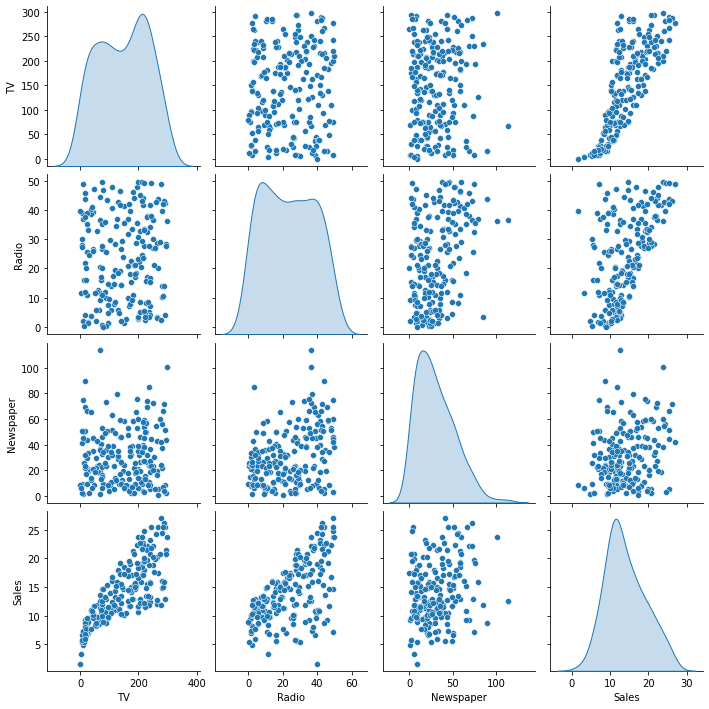

In [ ]:
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [ ]:
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


Variables Descriptivas (Input)

- **TV:** Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** Advertising dollars spent on Radio
- **Newspaper:** Advertising dollars spent on Newspaper

Variable Respuesta (Output)

- **Sales:** sales of a single product in a given market (in thousands of widgets)

# Ajuste lineal

Simple Linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales! 

In [ ]:
# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


Realizar predicción

In [ ]:
# Nuevo Dato
X_new = pd.DataFrame({'TV': [60]})
X_new.head()
# predecir para un nuevo valor
lm.predict(X_new)

array([9.88479198])

In [ ]:
print(lm.intercept_ + lm.coef_*60)

[9.88479198]


Plot ajuste

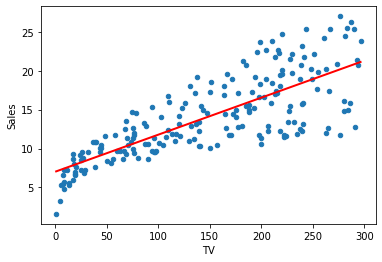

In [ ]:
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

# Realizar predicciones
preds = lm.predict(X_new)
preds

# Plot dato observado
data.plot(kind='scatter', x='TV', y='Sales')

# Plot ajuste
plt.plot(X_new, preds, c='red', linewidth=2)

In [ ]:
# Pre Modeling
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import seaborn as sns

data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)
data.columns = ['TV','Radio','Newspaper','Sales']
data.head()
X = data.drop(["Sales"],axis=1)
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)


regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.9072183330817297


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
fit_lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
print(fit_lm.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        15:17:10   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

# Ejercicios de validación del modelo

1. Media residuos igual a cero: Media residuos igual a 0
2. Homoscedasticidad: Residuos con misma varianza
3. Normalidad de los errores: distribución
4. No autocorrelación de los residuos: no tienen correlación por orden de magnitud
5. No Multicollinearidad

In [ ]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -2.540190280342358e-15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


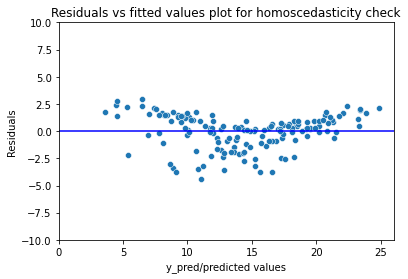

In [ ]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


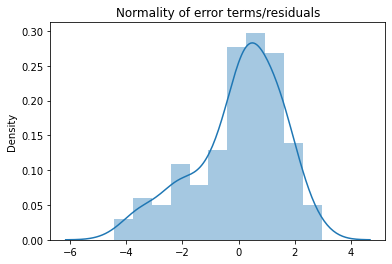

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


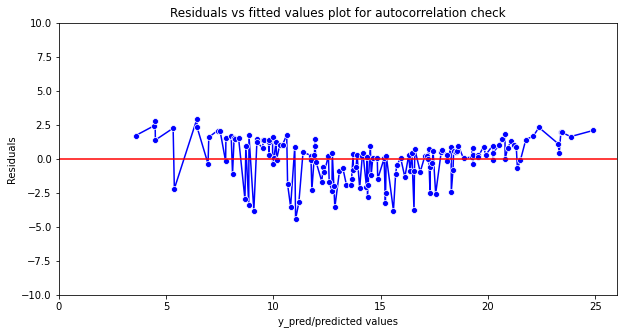

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

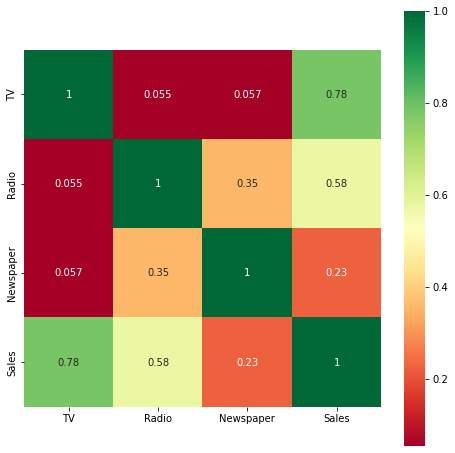

In [ ]:
plt.figure(figsize=(8,8))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)  # seaborn has very simple solution for heatmap

# Ejercicio
- En vistas que la variable Newspaper No es significativa, reajusta el modelo y valida el mismo

In [ ]:
fit_lm = (...)
print(fit_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           4.83e-98
Time:                        15:17:32   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

# Ejercicios de validación del modelo

1. Media residuos igual a cero: Media residuos igual a 0
2. Homoscedasticidad: Residuos con misma varianza
3. Normalidad de los errores: distribución
4. No autocorrelación de los residuos: no tienen correlación por orden de magnitud
5. No Multicollinearidad

In [ ]:
# Ralizamos las predicciones y sacamos el vector y^


In [ ]:
# Calculamos los residuos y sacamos su valor de la media de los residuos


Mean of Residuals 5.524469770534779e-15


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


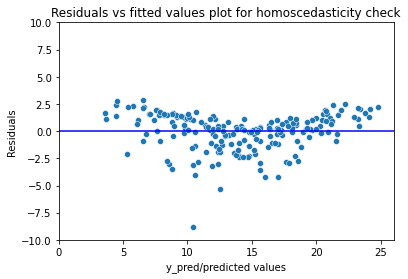

In [ ]:
# Homoscedasticidad de los residuos


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


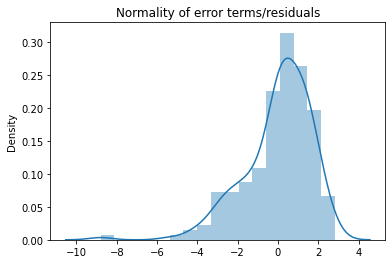

In [ ]:
## Distribución de los residuos
## Normalidad de los errores: distribución


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


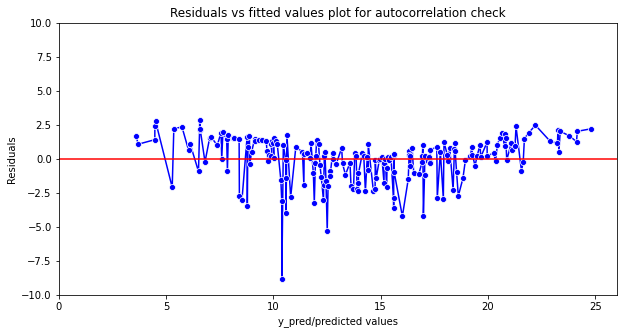

In [ ]:
## No autocorrelación de los residuos: no tienen correlación por orden de magnitud


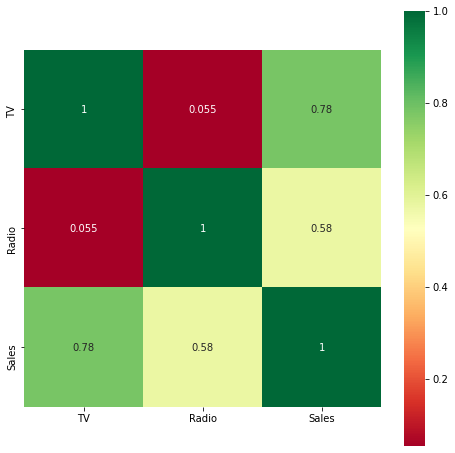

In [ ]:
# 5. No Multicollinearidad


In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# Ejercicio 2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
import seaborn as sns

# Importo como DF, para que no sólo sea copiar y pegar
df = pd.read_csv('https://raw.githubusercontent.com/ramcesc/slr_ww2weather/master/Summary%20of%20Weather.csv', index_col=0)
print(df.shape)
df.head()

(119040, 30)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
STA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Reshape to covert from numpy 1 array to numpy 2D array which is what we need to work with.

X = df['MinTemp'].values.reshape(-1,1)         #X contains the observations of the independent variable
Y = df['MaxTemp'].values.reshape(-1,1)         #Y contains the observations of the dependent variable
 
print("Type and size of the  vector X:", type(X), X.shape)
print("Type and size of the  vector Y:", type(Y), Y.shape)

Type and size of the  vector X: <class 'numpy.ndarray'> (119040, 1)
Type and size of the  vector Y: <class 'numpy.ndarray'> (119040, 1)


Text(0, 0.5, 'MaxTemp')

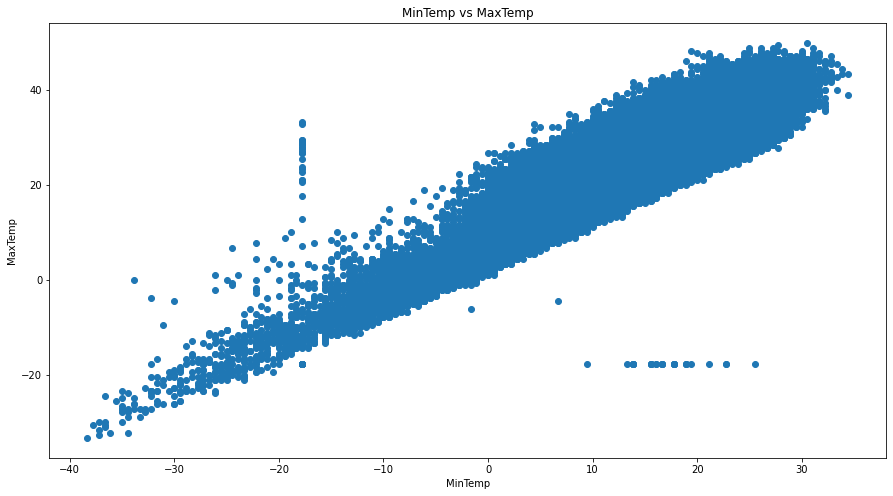

In [ ]:
#Scatter plot of the data

width = 15
height = 8
plt.figure(figsize=(width, height))

plt.scatter(X,Y)
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  

In [ ]:
fit_lm = smf.ols(formula='MaxTemp ~ MinTemp', data=df).fit()
print(fit_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                MaxTemp   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 4.020e+05
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:21:15   Log-Likelihood:            -3.3880e+05
No. Observations:              119040   AIC:                         6.776e+05
Df Residuals:                  119038   BIC:                         6.776e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7006      0.028    375.909      0.0

# Ejercicio

- Prueba diferentes variables para mejorar tu modelo, ¿qué variables pueden influenciar para la máxima temperatura?


In [ ]:
df.head()

,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
STA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp', 'MeanTemp',
       'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR', 'SPD', 'MAX',
       'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT',
       'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [ ]:
df.describe()

,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#fit_lm = smf.ols(formula='MaxTemp ~ MinTemp + MeanTemp', data=df).fit()
#print(fit_lm.summary())

- ¿Tiene sentido el modelo que stamos planteando?

In [ ]:
# Datos de ayer
df['MinTemp_1'] = df['MinTemp'].shift(1)
df['MeanTemp_1'] = df['MeanTemp'].shift(1)

In [ ]:
df['MinTemp'].shift(1)

STA
10001          NaN
10001    22.222222
10001    21.666667
10001    22.222222
10001    22.222222
           ...    
82506    18.888889
82506    18.333333
82506    18.333333
82506    18.333333
82506    18.333333
Name: MinTemp, Length: 119040, dtype: float64

In [ ]:
df['MinTemp']

STA
10001    22.222222
10001    21.666667
10001    22.222222
10001    22.222222
10001    21.666667
           ...    
82506    18.333333
82506    18.333333
82506    18.333333
82506    18.333333
82506    17.222222
Name: MinTemp, Length: 119040, dtype: float64

In [ ]:
fit_lm = smf.ols(formula='MaxTemp ~ MinTemp_1 + MeanTemp_1', data=df).fit()
print(fit_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                MaxTemp   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 6.923e+05
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:51:29   Log-Likelihood:            -2.7572e+05
No. Observations:              119039   AIC:                         5.514e+05
Df Residuals:                  119036   BIC:                         5.515e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9876      0.024     82.132      0.0

- ¿Podrías validar tu modelo lineal? 




